![nobel-prize](nobel-prize.jpg)

# 1. The Most Nobel of Prizes


The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.


The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file.

Let's now explore the data!

In [88]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# read in the data

nobel = pd.read_csv('/work/files/workspace/data/nobel.csv')

#check the head

nobel.head(10)



,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


# 2. So, who gets the Nobel Prize?

_What is the most commonly awarded gender and birth country?_

The majority of Nobel Prize winners are male (93%), with the United States being the leading birth country (30%).

In [89]:
top_gender = nobel['sex'].value_counts().idxmax()

print(nobel['sex'].value_counts())



Male      905
Female     65
Name: sex, dtype: int64


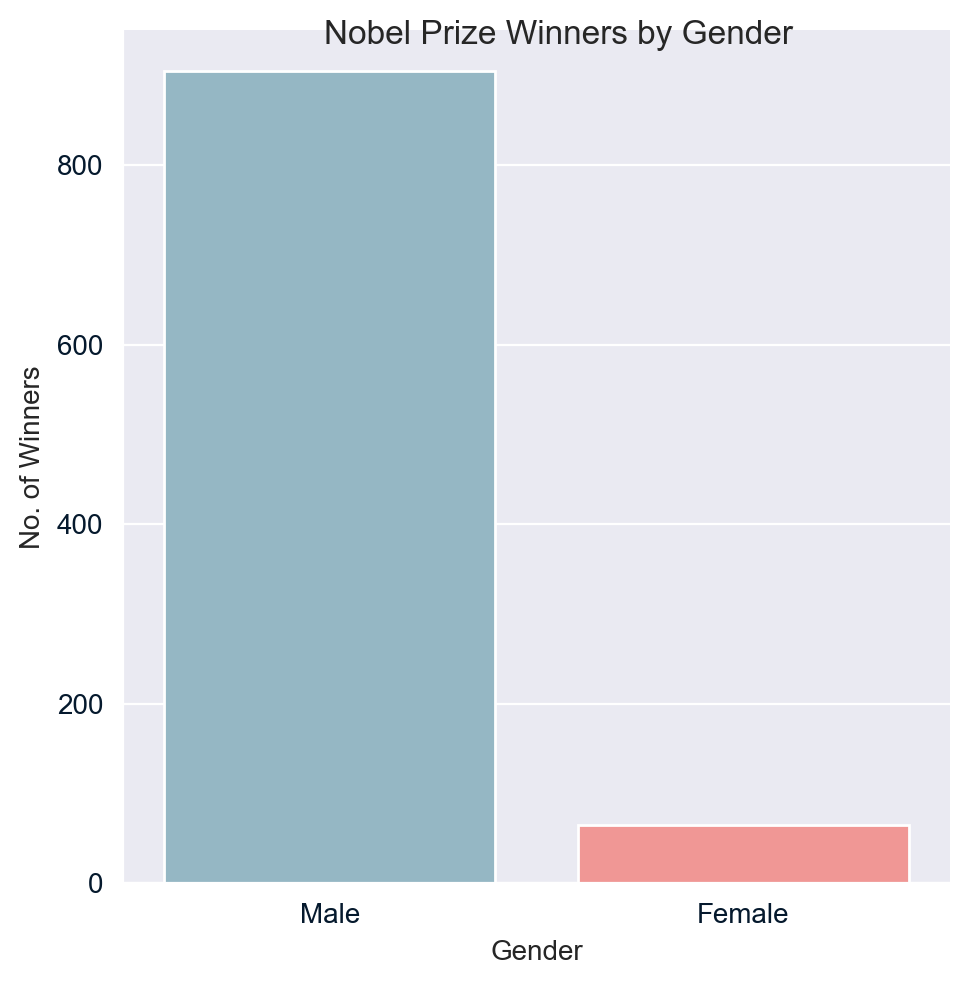

In [90]:
#viz

gender_counts = nobel['sex'].value_counts()

#convert to df

gender_df = gender_counts.reset_index()

gender_df.columns= ['Gender', 'No. of Winners']



#plotting
palette = {'Male': '#8DBBCC', 'Female': '#FF8886'} 
g= sns.catplot(x='Gender', y='No. of Winners', data=gender_df, kind='bar', palette=palette)
g._legend.remove() 
g.fig.suptitle('Nobel Prize Winners by Gender')


plt.show()

In [91]:
top_country = nobel['birth_country'].value_counts().idxmax()

print(nobel['birth_country'].value_counts())

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64


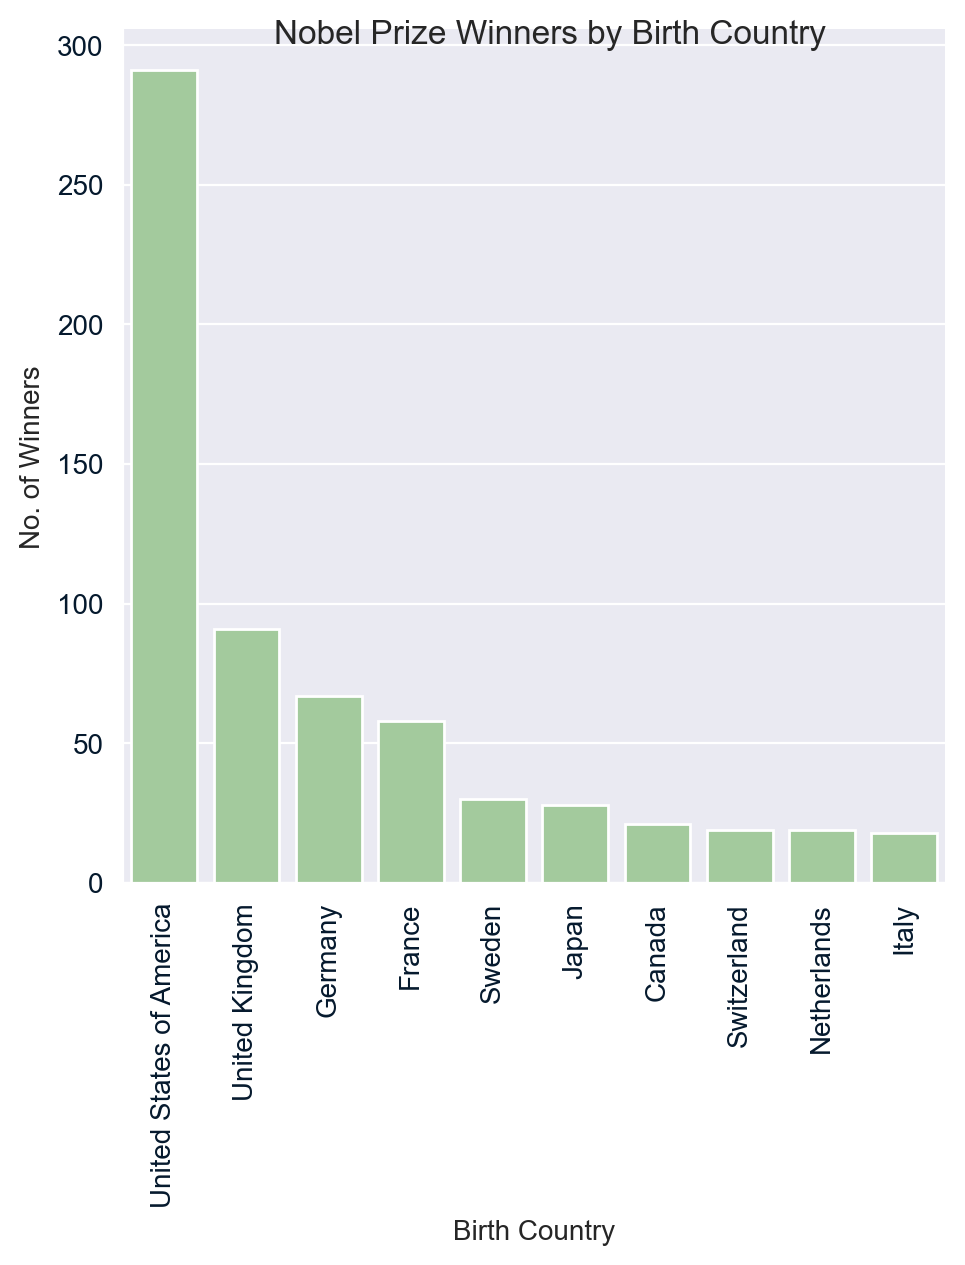

In [92]:
#viz

country_counts = nobel['birth_country'].value_counts()

#convert to df

country_df = country_counts.nlargest(10).reset_index()

country_df.columns= ['Birth Country', 'No. of Winners']



#plotting
g= sns.catplot(x='Birth Country', y='No. of Winners', data=country_df, kind='bar', hue='Birth Country', palette=['#9dd295'])
g.fig.suptitle('Nobel Prize Winners by Birth Country')
g._legend.remove()

plt.xticks(rotation=90)


plt.show()

# 3. US Dominance

_Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?_

A: 2000, with 42% US-born winners.



In [93]:
#create a decade column

nobel['decade'] = (nobel['year']//10)*10

#filter to US
us_nobel = nobel[nobel['birth_country'] == 'United States of America']


#Number of total winners per decade
per_decade = nobel.groupby('decade')['prize'].count()

#We'll now get the number of US-born winners per decade

us_per_decade = us_nobel.groupby('decade')['prize'].count()

# Getting the ratio

US_ratio = round(us_per_decade/per_decade, 2)

US_ratio.sort_values(ascending=False)



decade
2000    0.42
1990    0.40
2020    0.36
1970    0.32
1980    0.32
2010    0.31
1940    0.30
1950    0.29
1960    0.27
1930    0.25
1910    0.08
1920    0.07
1900    0.02
Name: prize, dtype: float64

# 4. US Dominance, visualized

In the 2000s, the ratio of US winners reached its peak at 0.42. Among the winners was former US President Barrack Obama, who was awarded the Nobel Peace Prize in 2009!

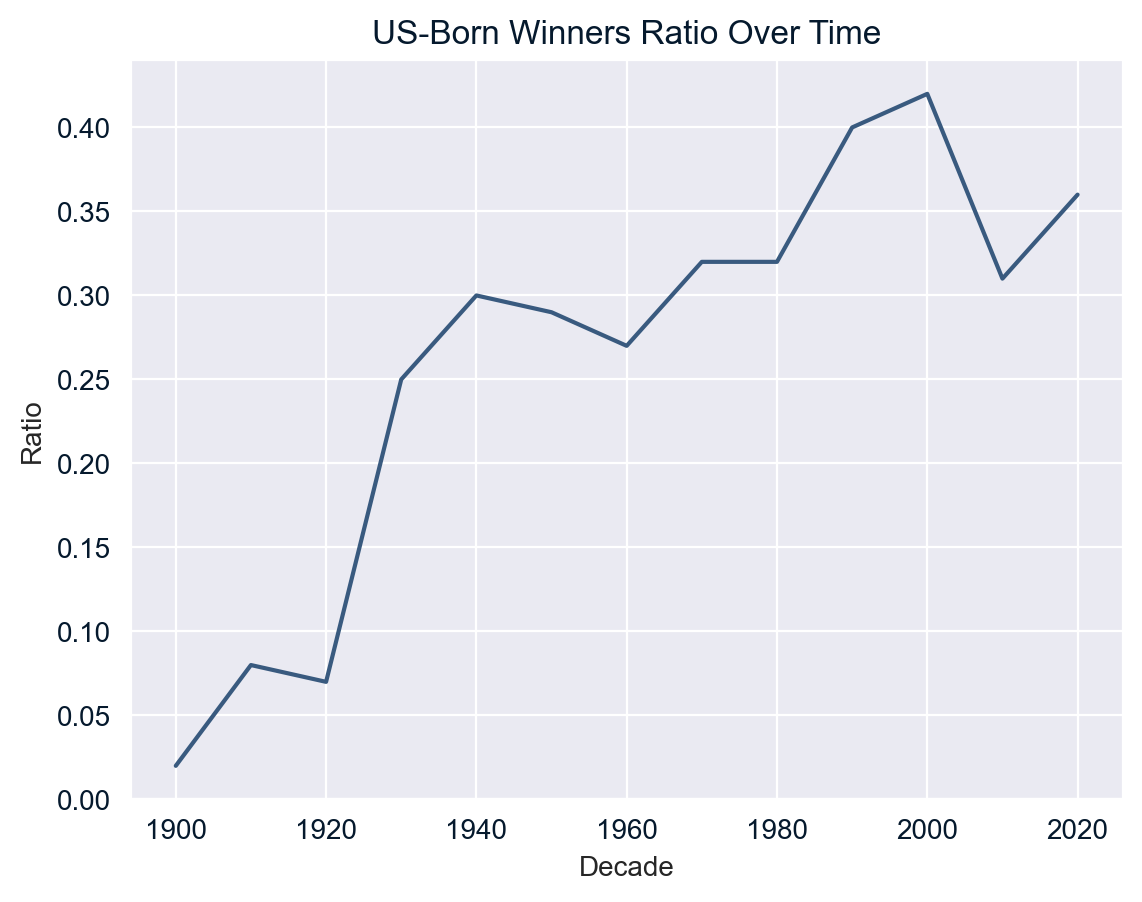

In [94]:
# convert to df
US_ratio_df = US_ratio.reset_index()  # Call the reset_index method

#rename columns
US_ratio_df.columns = ['Decade', 'Ratio']

#plotting
sns.set_style('darkgrid')
g = sns.lineplot(x='Decade', y='Ratio', data=US_ratio_df, color='#395a7f')
g.set_title('US-Born Winners Ratio Over Time')

plt.show()

In [104]:
#checking the list!

filter = (nobel['decade'] == 2000) & (nobel['birth_country']=='United States of America')

nobel[['full_name', 'category','prize','year']][filter]

,full_name,category,prize,year
706,Alan J. Heeger,Chemistry,The Nobel Prize in Chemistry 2000,2000
709,James J. Heckman,Economics,The Sveriges Riksbank Prize in Economic Scienc...,2000
710,Daniel L. McFadden,Economics,The Sveriges Riksbank Prize in Economic Scienc...,2000
713,Paul Greengard,Medicine,The Nobel Prize in Physiology or Medicine 2000,2000
718,Jack S. Kilby,Physics,The Nobel Prize in Physics 2000,2000
719,William S. Knowles,Chemistry,The Nobel Prize in Chemistry 2001,2001
721,K. Barry Sharpless,Chemistry,The Nobel Prize in Chemistry 2001,2001
722,George A. Akerlof,Economics,The Sveriges Riksbank Prize in Economic Scienc...,2001
723,A. Michael Spence,Economics,The Sveriges Riksbank Prize in Economic Scienc...,2001
724,Joseph E. Stiglitz,Economics,The Sveriges Riksbank Prize in Economic Scienc...,2001


In [105]:
#decade with the highest ratio

max_decade_usa = US_ratio.idxmax()

max_decade_usa

2000

# 5. What is the gender of a typical Nobel Prize winner?

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?



_Which decade and Nobel Prize category combination had the highest proportion of female laureates?_

## In 2020, women comprised half of the winners in the Literature category, marking the highest percentage of female laureates in Nobel Prize history!

<AxesSubplot: xlabel='decade', ylabel='ratio'>

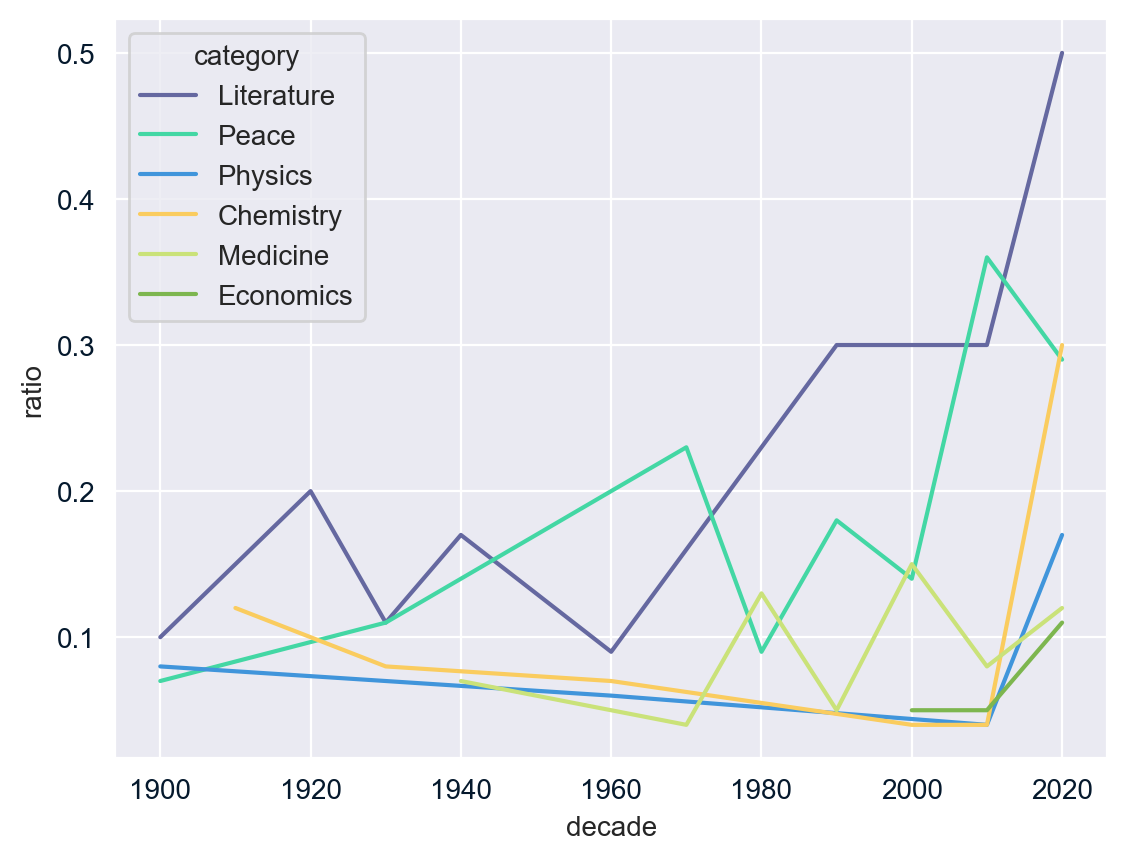

In [97]:
#filter to women

female_nob = nobel[nobel['sex'] == 'Female']

#group by decade and category

decade_cat = nobel.groupby(['decade', 'category'])['prize'].count()

#count of women grouped by decade and category

fem_decade_cat = female_nob.groupby(['decade', 'category'])['prize'].count()

#Compute for the ratio

female_ratio = round(fem_decade_cat/decade_cat, 2)
female_ratio.dropna(inplace=True)
female_ratio = female_ratio.reset_index(name='ratio')
                                        
#plotting

sns.lineplot(x='decade', y='ratio', data=female_ratio, hue='category')



## We can see that the proportions of female winners in Economics and Physics are significantly lower compared to other categories.







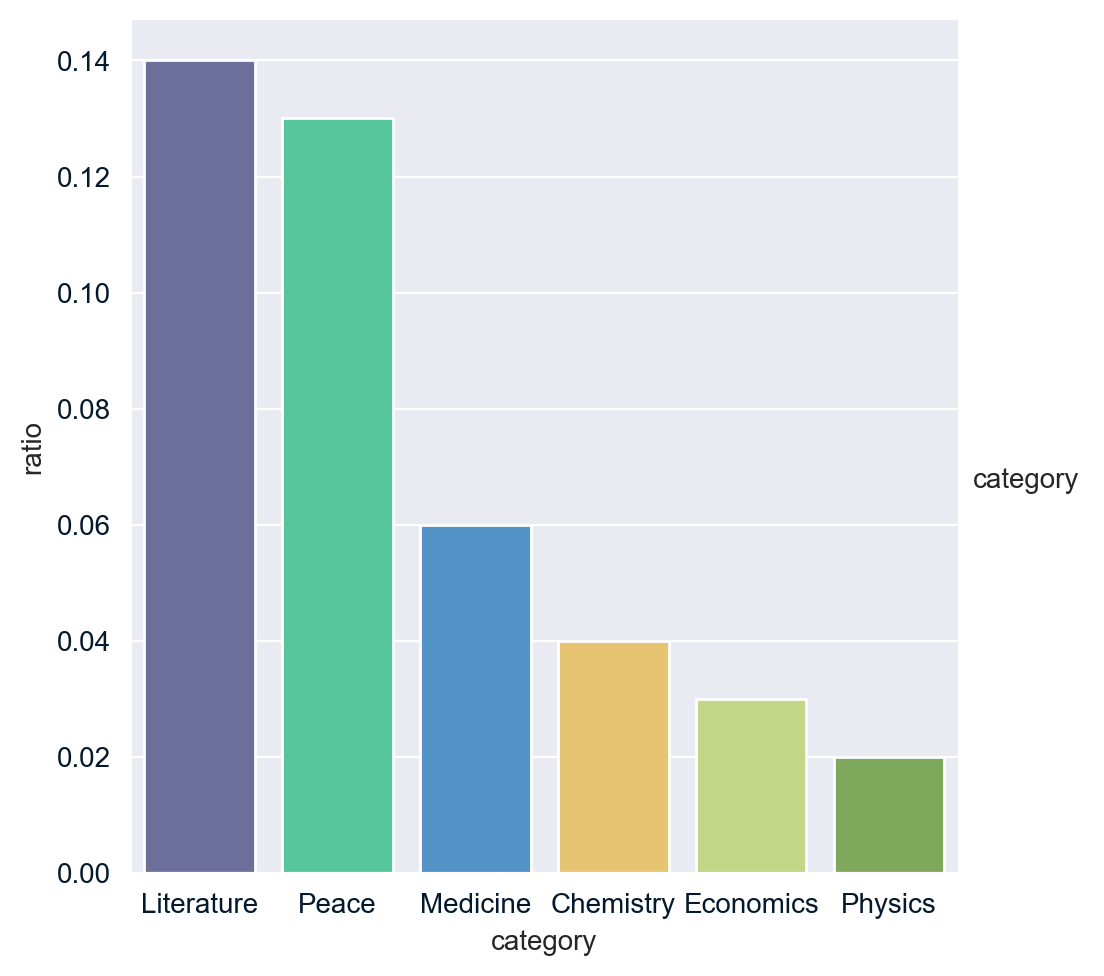

In [98]:
#group by category to count total winners
category_counts = nobel.groupby('category')['prize'].count()

#count of female winners grouped by category
female_category_counts = female_nob.groupby('category')['prize'].count()

# Compute for the ratio
female_ratio_2 = round(female_category_counts / category_counts, 2)
female_ratio_2.dropna(inplace=True)

# Reset index and rename the column
female_ratio_2 = female_ratio_2.reset_index(name='ratio')
female_ratio_2 = female_ratio_2.sort_values(by='ratio', ascending=False)
                                            
#plotting

sns.catplot(x='category', y='ratio', data=female_ratio_2, kind='bar', hue='category')


In [106]:
#Create a dictionary! :D

max_female_dict ={
       2020:'Literature'
}

max_female_dict

{2020: 'Literature'}

# 6. The first woman to win the Nobel Prize

 It's none other than Marie Curie, who won the Nobel Prize (Physics) in 1903 for her work on radioactivity! 

In [107]:
first_woman = female_nob[['year', 'full_name', 'motivation','laureate_id', 'category']]

#get the traits of the first woman first, lowest year and lowest laureate id

traits = first_woman[(first_woman['laureate_id'] == first_woman['laureate_id'].min()) & (first_woman['year'] == first_woman['year'].min())]

#Name

first_woman_name = traits['full_name'].iloc[0] #adding iloc to make the output a string

#category
first_woman_category = traits['category'].iloc[0]

first_woman.head(1)


,year,full_name,motivation,laureate_id,category
19,1903,"Marie Curie, née Sklodowska","""in recognition of the extraordinary services ...",6,Physics


# 7. Repeat Laureates

_Which individuals or organizations have won more than one Nobel Prize throughout the years?_

In [101]:
#get repeating names

names = nobel['full_name'].value_counts()

#filtering the ones that appear more than once 
duplicates = names[names > 1].index

#show repeating winners by filtering to duplicates

duplicate_rows = nobel[nobel['full_name'].isin(duplicates)]

repeat_list = duplicate_rows['full_name'].unique().tolist()
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Frederick Sanger']

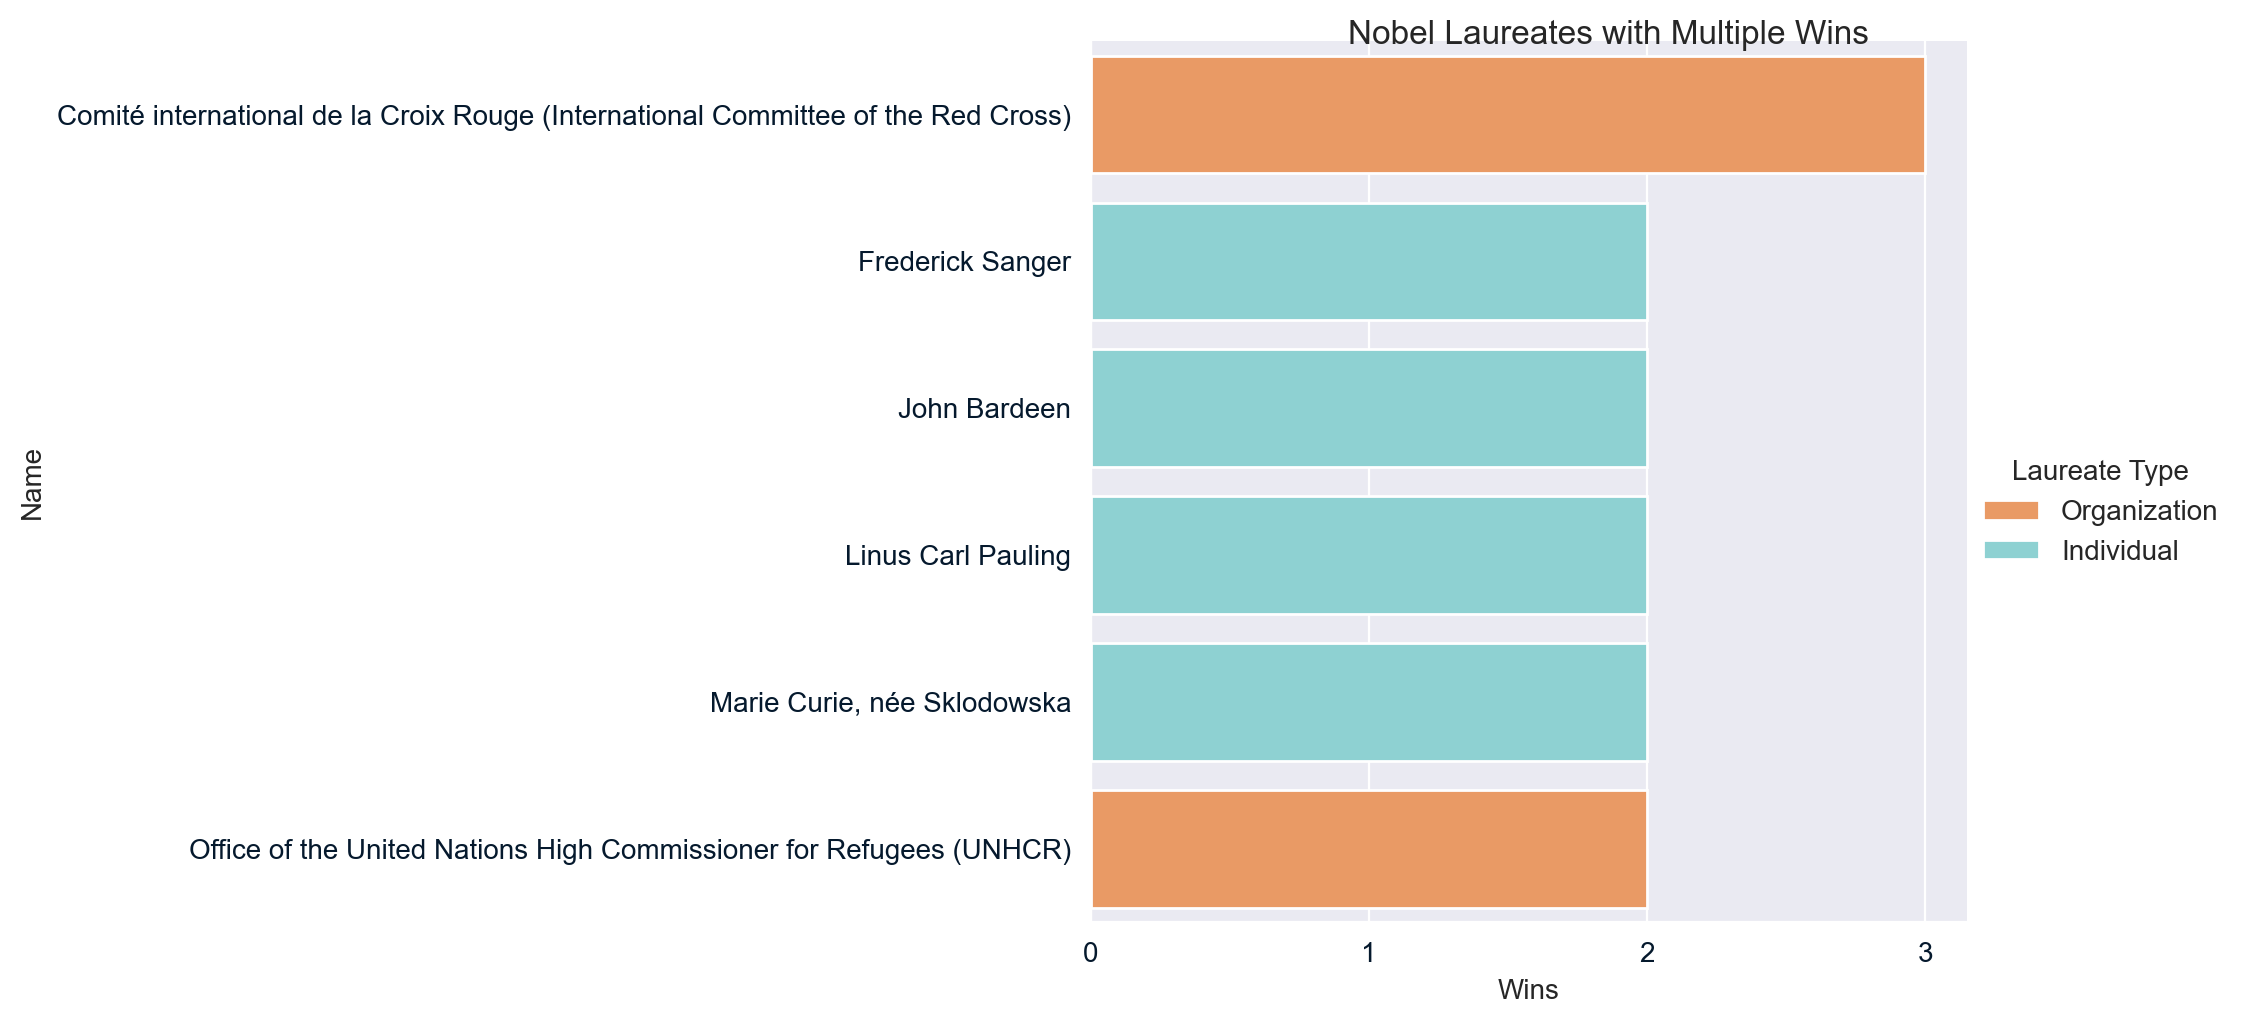

In [102]:
#viz

from matplotlib.ticker import MaxNLocator

duplicate_rows = nobel[nobel['full_name'].isin(duplicates)]


wins_count = duplicate_rows.groupby(['full_name', 'laureate_type']).size()

#convert to df
wins_count_df = wins_count.reset_index(name='Wins')

#rename cols
wins_count_df.columns = ['Name', 'Laureate Type', 'Wins']


# plotting
palette = {'Organization':'#ff964f', 'Individual':'#83dcdd'}
g = sns.catplot(x='Wins', y='Name', hue='Laureate Type', data=wins_count_df, kind='bar', orient='h', palette=palette)

g.fig.suptitle('Nobel Laureates with Multiple Wins')

#whole number y axis

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


plt.show()